# Visualisation
    Ce notebook a pour but de tester différentes visualisations avant de se lancer dans le dashboard dash







In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
path_input_csv = 'comments_2023-06-17_2133_sentiment.csv'
df = pd.read_csv(path_input_csv, sep=';')

In [11]:
# max episode_ID_number per series_name
df_max = df.groupby('series_name')['episode_ID_number'].max().reset_index()
df_max.columns = ['series_name', 'max_episode_ID_number']
print(df_max)



                      series_name  max_episode_ID_number
0          A Life Through Selfies                    316
1              Goth Girl The Jock                     32
2              How To Be A Dragon                     36
3  My Husband Changes Every Night                      5
4                   Nerd And Jock                    198
5                     Power Pills                    477
6                     Seekers Log                    168
7                        Weakhero                    240


In [ ]:
# 

## Time series sentiment analysis

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_10188\3373782521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily['Comment_Date'] = pd.to_datetime(df_daily['Comment_Date'], format='mixed')
C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_10188\3373782521.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily['Reply_Date'] = pd.to_datetime(df_daily['Reply_Date'], format='mixed')


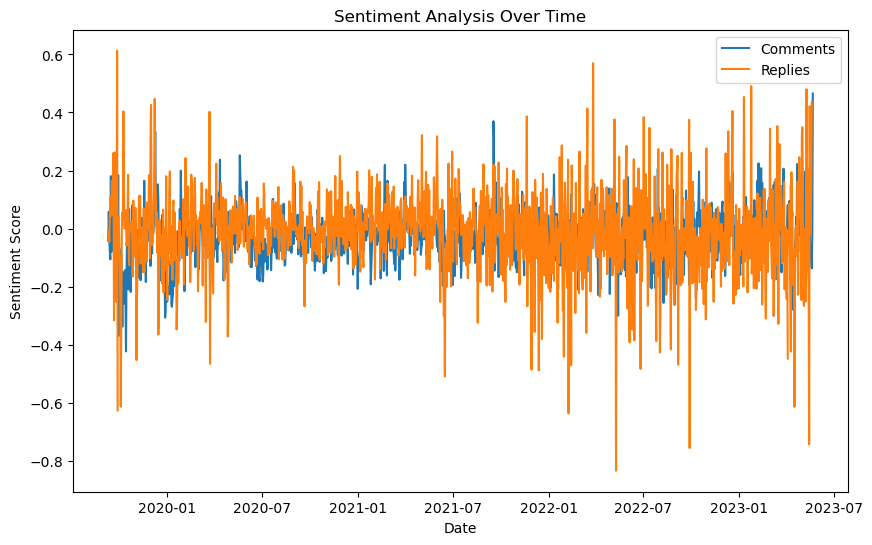

In [71]:
# filter for a serie using query pandas
df_daily = df.query('series_name == "Weakhero"')

# Resample sentiment scores to daily averages (or other desired frequency)
df_daily['Comment_Date'] = pd.to_datetime(df_daily['Comment_Date'], format='mixed')
df_daily['Reply_Date'] = pd.to_datetime(df_daily['Reply_Date'], format='mixed')
df_comment_daily = df_daily.resample('D', on='Comment_Date')['Sentiment_Score_comment'].mean()
df_reply_daily = df_daily.resample('D', on='Reply_Date')['Sentiment_Score_reply'].mean()

# Plot
plt.figure(figsize=(10,6))
plt.plot(df_comment_daily, label='Comments')
plt.plot(df_reply_daily, label='Replies')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis Over Time')
plt.legend()
plt.show()


## Histograms of sentiment scores

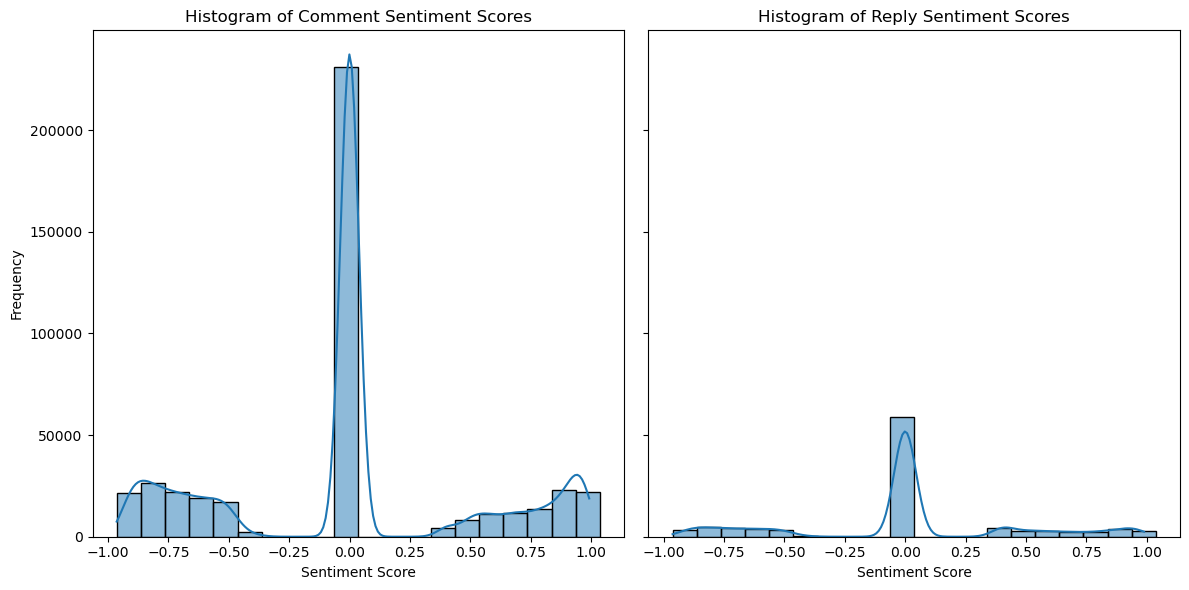

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots sharing the y-axis
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot histogram of Comment Sentiment Scores
sns.histplot(df, x="Sentiment_Score_comment", binwidth=0.1, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Comment Sentiment Scores')
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('Frequency')

# Plot histogram of Reply Sentiment Scores
sns.histplot(df, x="Sentiment_Score_reply", binwidth=0.1, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Reply Sentiment Scores')
axes[1].set_xlabel('Sentiment Score')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()






## Boxplots for sentiment across different genres or series

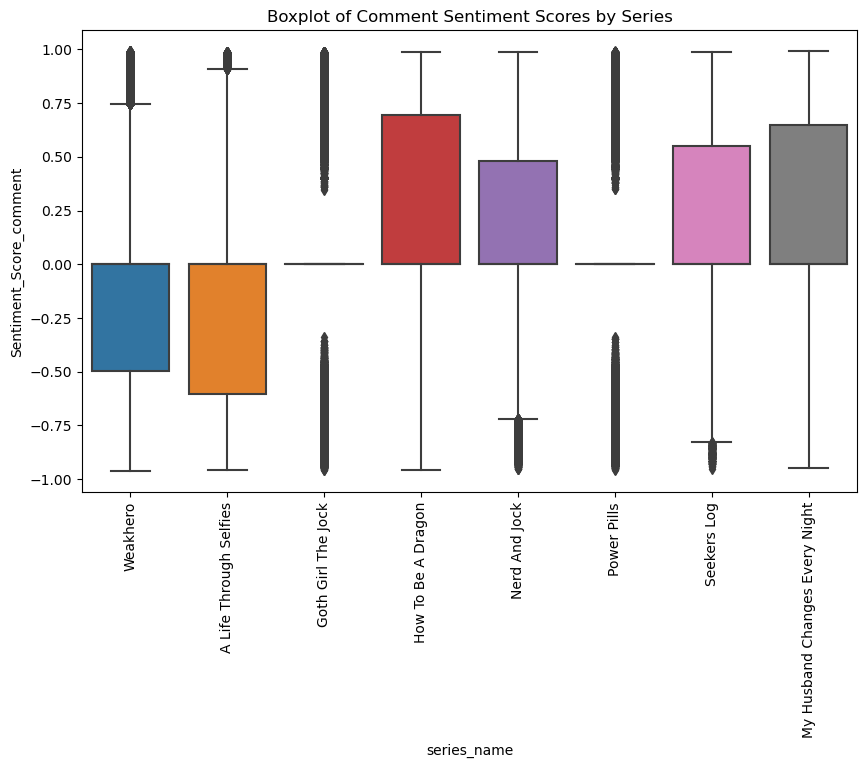

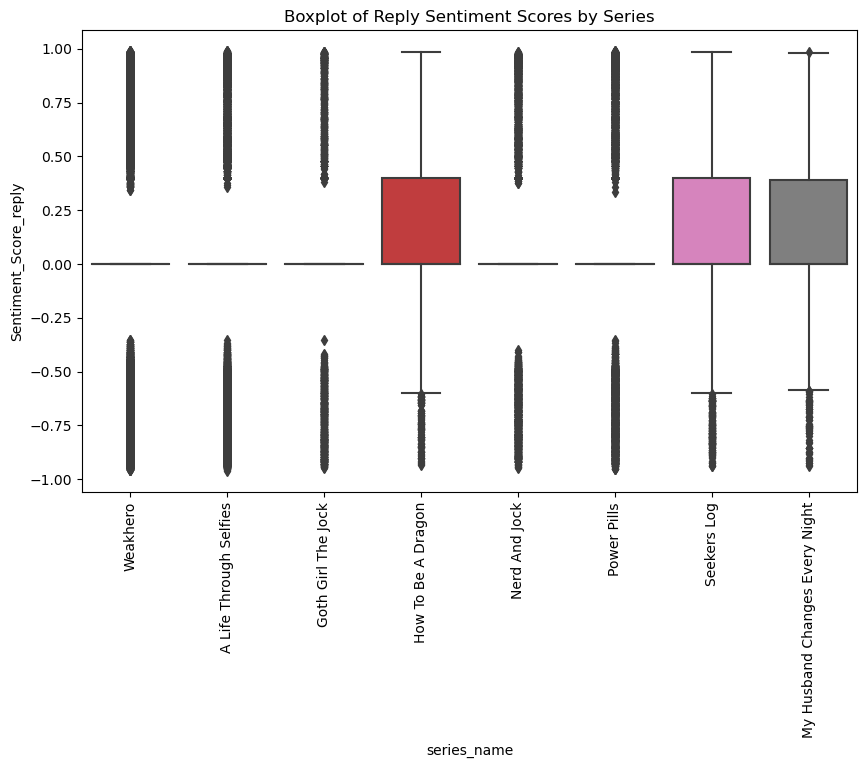

In [10]:
# Plot
plt.figure(figsize=(10,6))
sns.boxplot(x='series_name', y='Sentiment_Score_comment', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Comment Sentiment Scores by Series')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='series_name', y='Sentiment_Score_reply', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Reply Sentiment Scores by Series')
plt.show()


## Scatterplot of Likes vs. Sentiment Score:

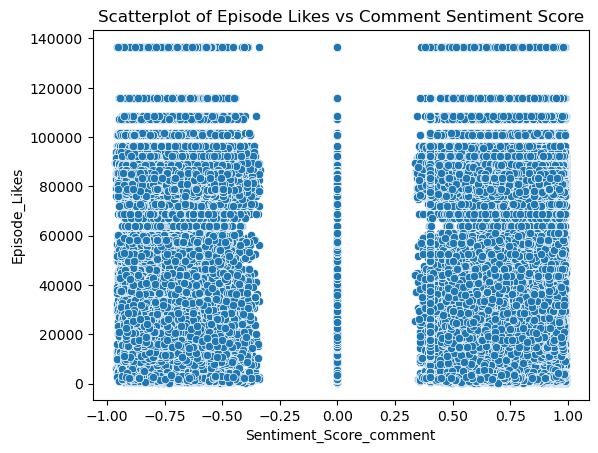

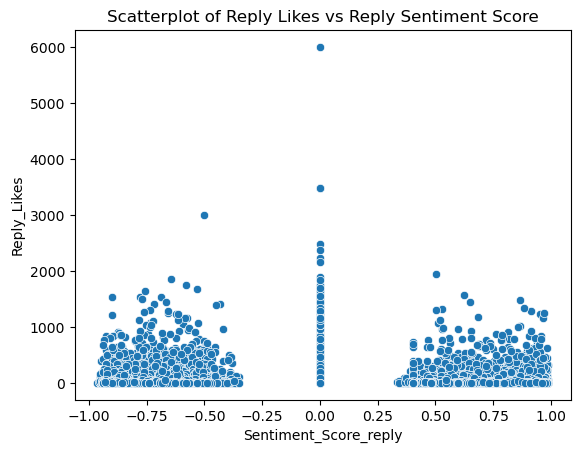

In [74]:
# Plot
sns.scatterplot(x='Sentiment_Score_comment', y='Episode_Likes', data=df)
plt.title('Scatterplot of Episode Likes vs Comment Sentiment Score')
plt.show()

sns.scatterplot(x='Sentiment_Score_reply', y='Reply_Likes', data=df)
plt.title('Scatterplot of Reply Likes vs Reply Sentiment Score')
plt.show()


## Heatmap of correlation

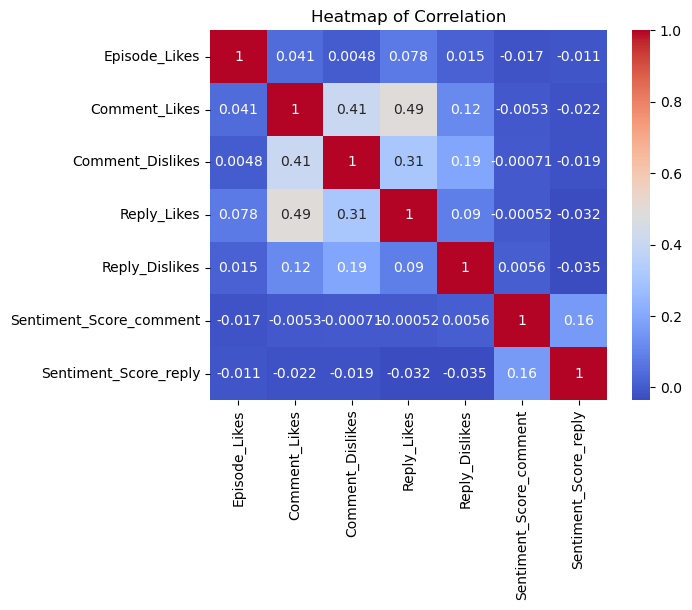

In [75]:
# Calculate correlation
correlation = df[['Episode_Likes', 'Comment_Likes', 'Comment_Dislikes', 'Reply_Likes', 'Reply_Dislikes', 'Sentiment_Score_comment', 'Sentiment_Score_reply']].corr()

# Plot
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation')
plt.show()


## Number of episode by genre

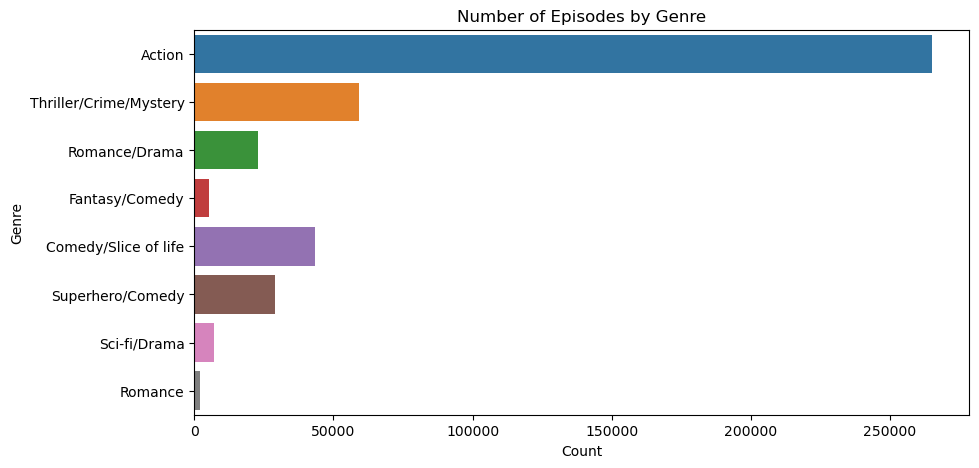

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='series_genre')
plt.title('Number of Episodes by Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

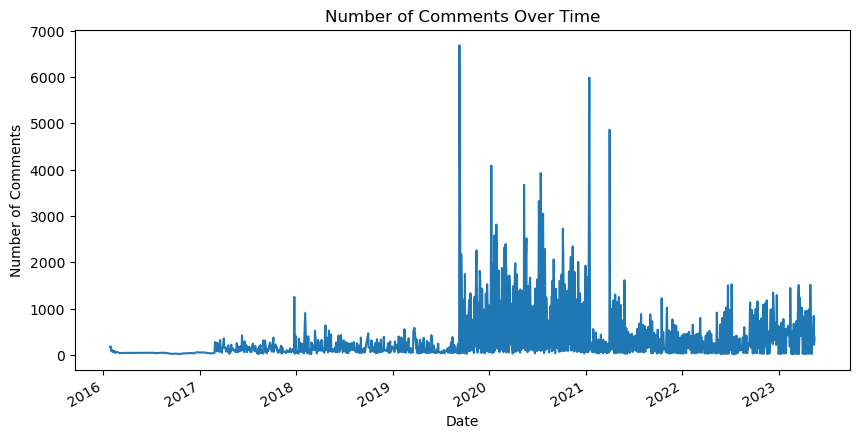

In [77]:
df['Episode_Date'] = pd.to_datetime(df['Episode_Date'])
plt.figure(figsize=(10, 5))
df.groupby('Episode_Date')['Comment_ID'].count().plot()
plt.title('Number of Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.show()

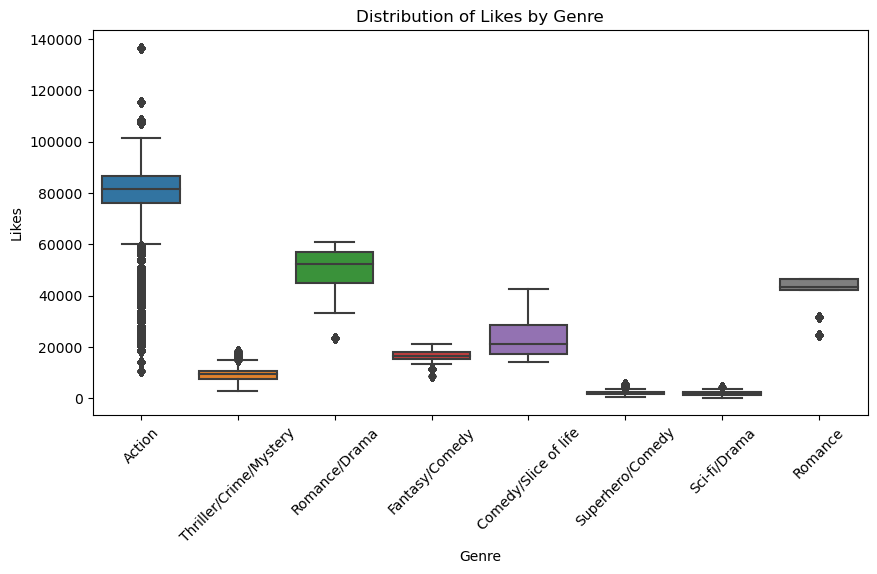

In [78]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='series_genre', y='Episode_Likes')
plt.title('Distribution of Likes by Genre')
plt.xlabel('Genre')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.show()

# Tests Thomas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path_input_csv = 'comments_2023-06-17_2133_sentiment.csv'
df = pd.read_csv(path_input_csv, sep=';')

In [ ]:
# Ensure your dates are in datetime format
df['Episode_Date'] = pd.to_datetime(df['Episode_Date'])
df['Comment_Date'] = pd.to_datetime(df['Comment_Date'])
df['Reply_Date'] = pd.to_datetime(df['Reply_Date'])


# Calculate the sentiment score for each comment and reply
# Handle empty comments and replies
def sentiment_score(row, label, score, text):
    if pd.isna(row[text]):
        return np.nan
    elif row[label] == 'positive':
        return row[score]
    elif row[label] == 'negative':
        return -1*row[score]
    else:
        return 0


df['Sentiment_Score_comment'] = df.apply(lambda row: sentiment_score(row,'SA_label_comment_text','SA_score_comment_text', 'Comment_Text'),axis=1)
df['Sentiment_Score_reply'] = df.apply(lambda row: sentiment_score(row,'SA_label_reply_text','SA_score_reply_text','Reply_Text'),axis=1)

In [ ]:
# Print unique series_name alongside their series_genre
print(df[['series_name','series_genre']].drop_duplicates())

df_likes_date = df[['series_genre','Episode_Date','Episode_Likes','episode_ID_number']]
#Keep only the unique occurence of series_name and episode_ID_number
df_likes_date = df_likes_date.drop_duplicates(subset=['series_genre','episode_ID_number'], keep='first')
# Order by series_genre and episode_ID_number
df_likes_date = df_likes_date.sort_values(by=['series_genre','episode_ID_number'])
df_likes_date = df_likes_date.reset_index(drop=True)

In [ ]:
#Group by series_genre and average the Episode_Likes
df_grouped_avg = df_likes_date.groupby(['series_genre']).mean().reset_index()

#Plot the data using plotly
import plotly.express as px
fig = px.bar(df_grouped_avg, x='series_genre', y='Episode_Likes', color='series_genre', title='Average likes per genre')
fig.show()

In [ ]:
# Count the number of episodes per series
df_grouped_count = df_likes_date.groupby(['series_genre']).count().reset_index()
df_grouped_count = df_grouped_count[['series_genre','Episode_Date']]
df_grouped_count.columns = ['series_genre','Episode_Count']

df_grouped_count.head(8)

In [ ]:
# Plot the likes per episode
fig = px.line(df_likes_date, x='episode_ID_number', y='Episode_Likes', color='series_genre', title='Likes per episode')
fig.show()

In [ ]:
# For each genre, store the number of likes of the first episode in a list
list_first_episode = []
for genre in df_grouped_count['series_genre']:
    list_first_episode.append(df_likes_date[df_likes_date['series_genre']==genre]['Episode_Likes'].iloc[0])

print(list_first_episode)

# For each genre, calcualte the percentage of likes compared to the first episode
df_likes_date['Percentage_Likes'] = df_likes_date.apply(lambda row: row['Episode_Likes']/list_first_episode[df_grouped_count[df_grouped_count['series_genre']==row['series_genre']].index[0]], axis=1)

# Plot the percentage of likes compared to the first episode
fig = px.line(df_likes_date, x='episode_ID_number', y='Percentage_Likes', color='series_genre', title='Percentage of likes compared to the first episode')
fig.show()

In [ ]:
df_sentiment_score = df[['series_genre','Episode_Date','Episode_Likes','episode_ID_number','Sentiment_Score_comment','Sentiment_Score_reply']]
#Keep only the occurence where the Sentiment_Score_comment and Sentiment_Score_reply are not 0
df_sentiment_score_nozero = df_sentiment_score[(df_sentiment_score['Sentiment_Score_comment']!=0)]
df_sentiment_score_nozero = df_sentiment_score_nozero.dropna(subset=['Sentiment_Score_comment'])

In [ ]:
# Create a boxplot of the sentiment score per genre using plotly
fig = px.box(df_sentiment_score_nozero, x='series_genre', y='Sentiment_Score_comment', color='series_genre', title='Sentiment score per genre')
fig.show()

In [ ]:
#Print the list of genres
print(df_sentiment_score_nozero['series_genre'].unique())